In [42]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
import backtrader as bt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

import pandas_datareader as pdr
import FinanceDataReader as fdr
from pykrx import stock

import talib
from talib import abstract


import yfinance as yf
import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [124]:
def my_EMA(df, period = 20, column = 'Close') :
    return df[column].ewm(span=period, min_periods=period, adjust = False).mean()

def my_MACD(df, period_long = 26, period_short = 12, period_signal = 9, column = 'Close') :
    
    ShortEMA = my_EMA(df, period_short, column = column)
    LongEMA = my_EMA(df, period_long, column = column)
    df['MACD'] = ShortEMA - LongEMA
    df['Signal_Line'] = my_EMA(df, period_signal, column = 'MACD')
    df['MACD_Hist']= df['MACD']-df['Signal_Line']
    
    return df

In [3]:
def codefind(name):   #코드반환(한글입력 후 코드반환) 
    krx = fdr.StockListing('KRX')
    search = list(krx['Name'])
    for i in range(len(krx)):
        if (search[i]==name):
            print(krx['Symbol'][i])
            return
codefind('아모레퍼시픽')

090430


In [6]:
start  = "2008-04-02"
end    = "2009-03-23"
ticker = "090430"  
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2008-04-02,53013,53213,51713,52614,16802
2008-04-03,52113,54414,52013,54014,19845
2008-04-04,54113,56014,53513,55814,16151
2008-04-07,56014,56614,55514,56615,9271
2008-04-08,56714,57014,56114,56214,8698


In [21]:
start  = "2009-03-23"
end    = "2010-03-15"
ticker = "090430"  
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2009-03-23,58815,59615,57714,57715,56631
2009-03-24,58415,58415,56714,58015,30580
2009-03-25,58014,58415,57614,58015,17611
2009-03-26,58014,59115,57614,59115,30490
2009-03-27,58815,60415,58114,60115,31774


In [28]:
start  = "2014-04-04"
end    = "2015-03-25"
ticker = "090430"  
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2014-04-04,127032,127432,125432,126032,13303
2014-04-07,126032,129033,126032,128433,8693
2014-04-08,128433,129433,125932,127133,8934
2014-04-09,127032,128533,126632,127533,16809
2014-04-10,129533,133534,128132,133534,20571


In [36]:
start  = "2015-04-03"
end    = "2016-03-23"
ticker = "090430"  
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2015-04-03,325383,328884,321282,324884,13643
2015-04-06,324983,327584,318081,325484,14786
2015-04-07,327884,328084,322583,323983,11082
2015-04-08,323083,332085,322082,332085,15250
2015-04-09,334286,336986,328284,329685,21081


In [ ]:
start  = "2016-04-11"
end    = "2017-04-03"
ticker = "090430"  
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

In [51]:
start  = "2017-04-07"
end    = "2018-03-28"
ticker = "090430"  
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2017-04-07,277000,277500,272500,274000,190053
2017-04-10,272000,272500,269000,270500,238276
2017-04-11,270000,272500,269000,270000,140914
2017-04-12,270000,271000,268000,270500,85835
2017-04-13,270500,272500,270000,272500,149653


In [7]:
아모레퍼시픽 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
아모레퍼시픽.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2009-03-17,59915,60115,58415,59015,13037,473.865091,-89.400155,563.265246
2009-03-18,59415,59515,57514,57515,20190,375.562842,3.592444,371.970398
2009-03-19,57514,58214,57414,58015,11104,334.151532,69.704262,264.447270
2009-03-20,58915,59115,58214,58715,10048,353.739234,126.511256,227.227978
2009-03-23,58815,59615,57714,57715,56631,285.282429,158.265491,127.016938


In [22]:
아모레퍼시픽09 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
아모레퍼시픽09.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2010-03-09,81420,81520,79920,80021,16631,-273.303278,-715.499227,442.195948
2010-03-10,80020,81220,80020,80621,8535,-191.188203,-610.637022,419.448819
2010-03-11,81020,81621,80920,81421,9057,-60.856584,-500.680934,439.824351
2010-03-12,81621,83121,81621,83121,9497,177.561142,-365.032519,542.593661
2010-03-15,83121,83921,82021,83021,4162,354.354960,-221.155023,575.509983


In [31]:
아모레퍼시픽14 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
아모레퍼시픽14.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2015-03-19,313880,323883,305578,319082,18365,10154.522705,7693.953320,2460.569385
2015-03-20,317181,326083,317181,322183,18551,11362.948503,8427.752357,2935.196146
2015-03-23,323183,324483,313480,315181,14256,11621.664458,9066.534777,2555.129681
2015-03-24,316281,328984,313080,327984,16836,12713.243461,9795.876514,2917.366947
2015-03-25,328084,339087,328084,337487,19371,14181.662982,10673.033807,3508.629174


In [37]:
아모레퍼시픽15 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
아모레퍼시픽15.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2016-03-17,389000,398000,388000,390500,135278,-1027.891937,-4594.420473,3566.528536
2016-03-18,387500,394000,381500,394000,145321,605.637632,-3554.408852,4160.046484
2016-03-21,393000,393000,383500,388500,129372,1439.820199,-2555.563042,3995.383240
2016-03-22,388500,389500,378500,381000,117903,1478.683233,-1748.713787,3227.397020
2016-03-23,379500,384500,378000,381500,86555,1532.166428,-1092.537744,2624.704172


In [46]:
아모레퍼시픽16 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
아모레퍼시픽16.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2017-03-28,288000,292000,286500,290500,227395,-1045.686230,-3499.492817,2453.806588
2017-03-29,291000,293500,289500,290000,769030,-420.450225,-2883.684299,2463.234074
2017-03-30,290000,290000,281000,283000,600885,-484.206059,-2403.788651,1919.582592
2017-03-31,282000,283000,277500,280500,294395,-728.069393,-2068.644799,1340.575407
2017-04-03,280500,283000,278500,280000,384705,-950.719362,-1845.059712,894.340350


In [56]:
아모레퍼시픽17 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
아모레퍼시픽17.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2018-03-22,299500,304000,295000,297000,210316,2645.642824,1743.424508,902.218316
2018-03-23,292000,294500,288000,288500,164137,1595.454940,1713.830595,-118.375654
2018-03-26,286000,297000,284000,296500,178811,1392.652980,1649.595072,-256.942091
2018-03-27,299500,305500,297500,304500,200141,1856.068505,1690.889758,165.178747
2018-03-28,303500,308000,300500,304500,171783,2197.991568,1792.310120,405.681448


+매수 2008-06-10  62616.00
-매도 2008-06-13  61416.00
+매수 2008-06-17  63816.00
-매도 2008-06-30  64817.00
+매수 2008-07-23  59515.00
-매도 2008-08-21  63916.00
+매수 2008-09-02  67717.00
-매도 2008-09-04  64016.00
+매수 2008-09-19  65617.00
-매도 2008-09-22  63816.00
+매수 2008-09-25  65917.00
-매도 2008-09-30  64517.00
+매수 2008-10-06  66017.00
-매도 2008-10-07  65017.00
+매수 2008-10-22  62816.00
-매도 2008-10-23  58915.00
+매수 2008-11-06  59315.00
-매도 2008-12-01  58515.00
+매수 2008-12-17  60816.00
-매도 2009-01-09  59915.00
+매수 2009-01-28  62616.00
-매도 2009-02-04  59115.00
+매수 2009-02-26  56214.00
-매도 2009-03-02  54114.00
+매수 2009-03-05  56515.00


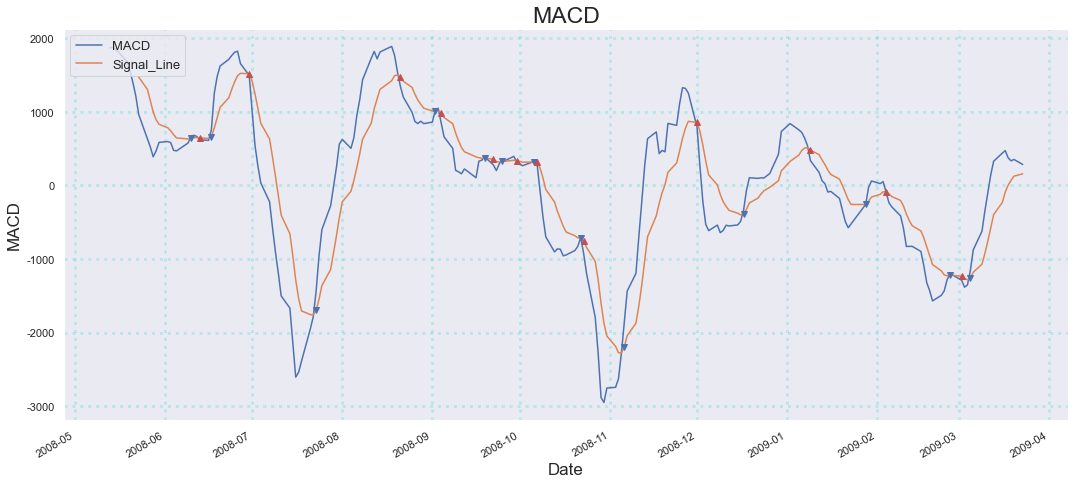

In [10]:
fig, ax1 = plt.subplots(figsize = (25, 5))
아모레퍼시픽[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(아모레퍼시픽.index)):
    if (아모레퍼시픽["MACD"].values[i] >= 아모레퍼시픽["Signal_Line"].values[i]) and (아모레퍼시픽["MACD"].values[i-1] < 아모레퍼시픽["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(아모레퍼시픽.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽.index.values[i], 아모레퍼시픽['Signal_Line'].values[i], 'bv')
    elif (아모레퍼시픽["MACD"].values[i] <= 아모레퍼시픽["Signal_Line"].values[i]) and (아모레퍼시픽["MACD"].values[i-1] > 아모레퍼시픽["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(아모레퍼시픽.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽.index.values[i], 아모레퍼시픽['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

+매수 2009-06-09  62916.00
-매도 2009-07-14  68218.00
+매수 2009-07-15  69918.00
-매도 2009-07-20  69618.00
+매수 2009-08-07  73519.00
-매도 2009-08-27  72819.00
+매수 2009-09-10  76020.00
-매도 2009-10-09  83021.00
+매수 2009-11-02  84622.00
-매도 2009-11-11  81921.00
+매수 2009-11-16  87623.00
-매도 2009-11-30  85922.00
+매수 2009-12-24  90923.00
-매도 2010-01-06  86022.00
+매수 2010-02-02  82221.00
-매도 2010-02-04  79120.00
+매수 2010-02-17  80221.00


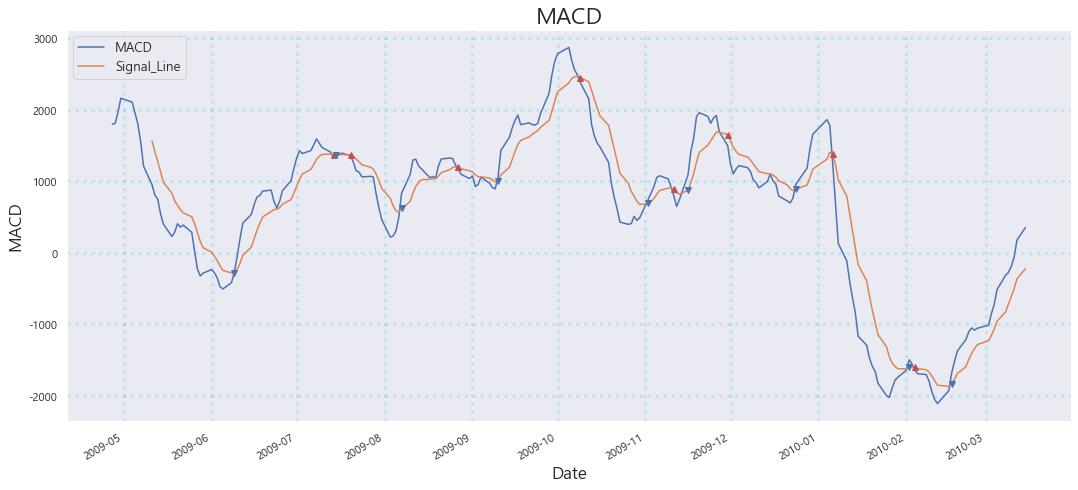

In [23]:
fig, ax1 = plt.subplots(figsize = (25, 5))
아모레퍼시픽09[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(아모레퍼시픽09.index)):
    if (아모레퍼시픽09["MACD"].values[i] >= 아모레퍼시픽09["Signal_Line"].values[i]) and (아모레퍼시픽09["MACD"].values[i-1] < 아모레퍼시픽09["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(아모레퍼시픽09.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽09['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽09.index.values[i], 아모레퍼시픽09['Signal_Line'].values[i], 'bv')
    elif (아모레퍼시픽09["MACD"].values[i] <= 아모레퍼시픽09["Signal_Line"].values[i]) and (아모레퍼시픽09["MACD"].values[i-1] > 아모레퍼시픽09["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(아모레퍼시픽09.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽09['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽09.index.values[i], 아모레퍼시픽09['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

-매도 2014-05-30  144937.00
+매수 2014-06-20  155140.00
-매도 2014-06-27  150139.00
+매수 2014-07-04  158041.00
-매도 2014-07-22  166043.00
+매수 2014-07-31  177046.00
-매도 2014-08-29  211054.00
+매수 2014-09-26  235561.00
-매도 2014-10-07  231960.00
+매수 2014-10-22  250064.00
-매도 2014-10-29  237561.00
+매수 2014-11-25  233060.00
-매도 2014-12-09  231360.00
+매수 2015-01-05  230759.00
-매도 2015-01-07  214455.00
+매수 2015-01-13  233560.00
-매도 2015-02-17  278372.00
+매수 2015-02-24  297377.00
-매도 2015-02-26  285574.00
+매수 2015-03-16  303978.00


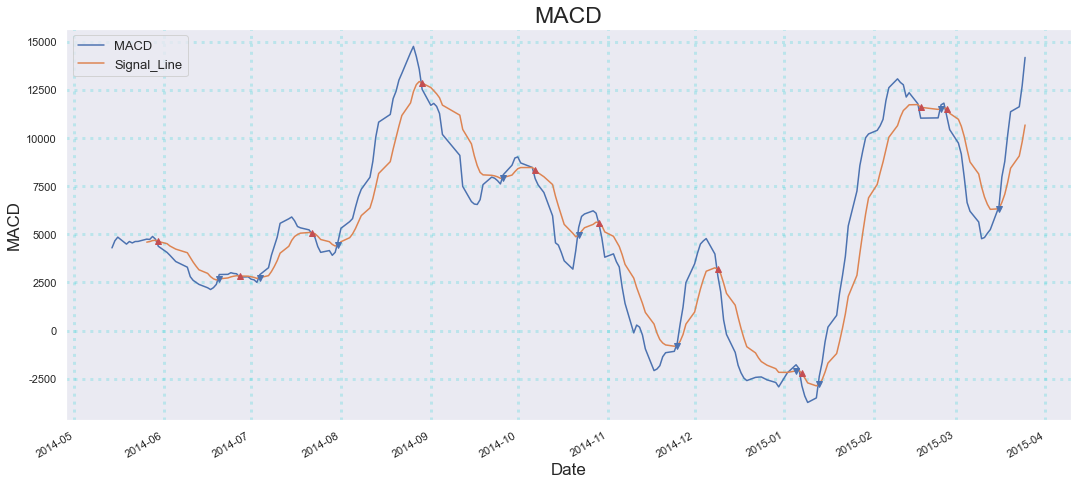

In [44]:
fig, ax1 = plt.subplots(figsize = (25, 5))
아모레퍼시픽14[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(아모레퍼시픽14.index)):
    if (아모레퍼시픽14["MACD"].values[i] >= 아모레퍼시픽14["Signal_Line"].values[i]) and (아모레퍼시픽14["MACD"].values[i-1] < 아모레퍼시픽14["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(아모레퍼시픽14.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽14['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽14.index.values[i], 아모레퍼시픽14['Signal_Line'].values[i], 'bv')
    elif (아모레퍼시픽14["MACD"].values[i] <= 아모레퍼시픽14["Signal_Line"].values[i]) and (아모레퍼시픽14["MACD"].values[i-1] > 아모레퍼시픽14["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(아모레퍼시픽14.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽14['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽14.index.values[i], 아모레퍼시픽14['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

-매도 2015-05-27  406500.00
+매수 2015-06-24  403500.00
-매도 2015-07-08  380000.00
+매수 2015-07-28  411500.00
-매도 2015-08-07  407500.00
+매수 2015-08-10  415500.00
-매도 2015-08-11  401000.00
+매수 2015-08-28  379000.00
-매도 2015-09-04  332000.00
+매수 2015-09-11  351000.00
-매도 2015-10-13  358500.00
+매수 2015-10-27  375500.00
-매도 2015-11-10  373000.00
+매수 2015-11-19  394500.00
-매도 2015-12-07  405000.00
+매수 2016-01-28  396500.00
-매도 2016-02-12  371000.00
+매수 2016-03-02  377500.00
-매도 2016-03-11  357500.00
+매수 2016-03-14  367000.00


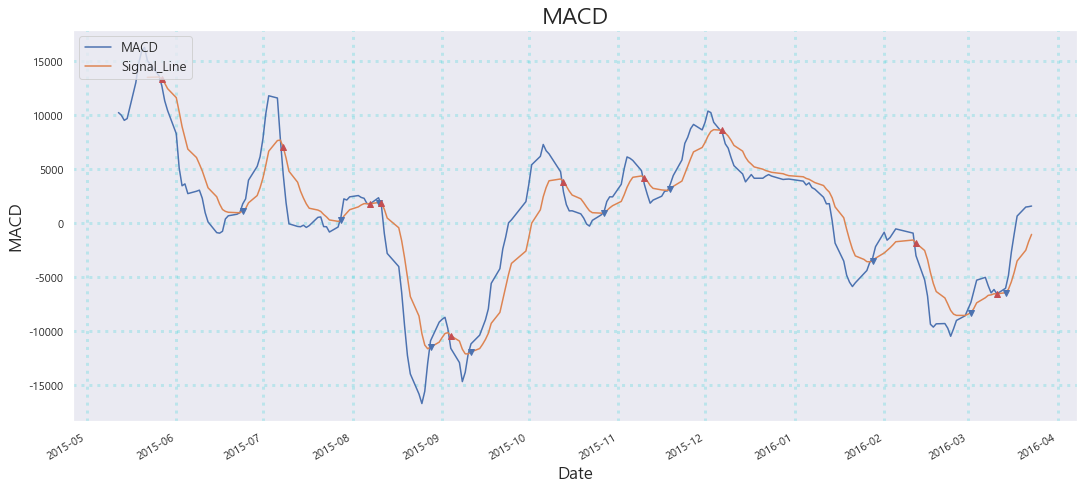

In [38]:
fig, ax1 = plt.subplots(figsize = (25, 5))
아모레퍼시픽15[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(아모레퍼시픽15.index)):
    if (아모레퍼시픽15["MACD"].values[i] >= 아모레퍼시픽15["Signal_Line"].values[i]) and (아모레퍼시픽15["MACD"].values[i-1] < 아모레퍼시픽15["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(아모레퍼시픽15.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽15['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽15.index.values[i], 아모레퍼시픽15['Signal_Line'].values[i], 'bv')
    elif (아모레퍼시픽15["MACD"].values[i] <= 아모레퍼시픽15["Signal_Line"].values[i]) and (아모레퍼시픽15["MACD"].values[i-1] > 아모레퍼시픽15["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(아모레퍼시픽15.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽15['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽15.index.values[i], 아모레퍼시픽15['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

+매수 2016-06-07  425000.00
-매도 2016-06-13  410000.00
+매수 2016-06-28  423500.00
-매도 2016-07-11  421500.00
+매수 2016-08-11  396500.00
-매도 2016-09-13  378000.00
+매수 2016-09-20  390000.00
-매도 2016-09-21  386000.00
+매수 2016-09-22  394000.00
-매도 2016-10-05  389000.00
+매수 2016-11-07  357500.00
-매도 2016-11-18  346000.00
+매수 2016-12-12  324500.00
-매도 2017-01-05  310000.00
+매수 2017-01-13  314500.00
-매도 2017-02-03  301500.00
+매수 2017-02-21  292000.00
-매도 2017-03-03  251500.00
+매수 2017-03-14  277000.00


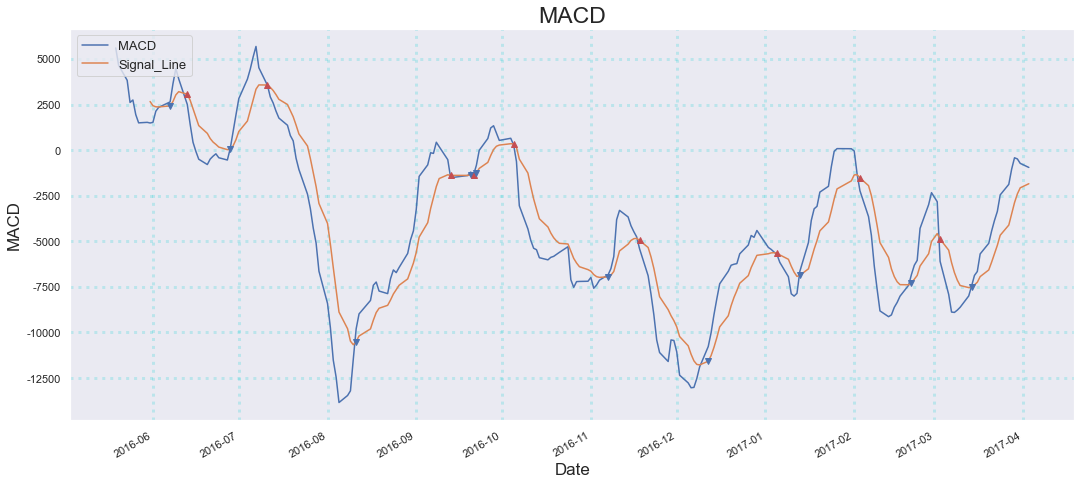

In [47]:
fig, ax1 = plt.subplots(figsize = (25, 5))
아모레퍼시픽16[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(아모레퍼시픽16.index)):
    if (아모레퍼시픽16["MACD"].values[i] >= 아모레퍼시픽16["Signal_Line"].values[i]) and (아모레퍼시픽16["MACD"].values[i-1] < 아모레퍼시픽16["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(아모레퍼시픽16.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽16['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽16.index.values[i], 아모레퍼시픽16['Signal_Line'].values[i], 'bv')
    elif (아모레퍼시픽16["MACD"].values[i] <= 아모레퍼시픽16["Signal_Line"].values[i]) and (아모레퍼시픽16["MACD"].values[i-1] > 아모레퍼시픽16["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(아모레퍼시픽16.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽16['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽16.index.values[i], 아모레퍼시픽16['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

+매수 2017-07-18  296000.00
-매도 2017-08-01  280500.00
+매수 2017-08-02  287000.00
-매도 2017-08-04  279500.00
+매수 2017-08-07  282000.00
-매도 2017-08-08  280000.00
+매수 2017-08-09  282000.00
-매도 2017-09-07  280500.00
+매수 2017-09-29  259500.00
-매도 2017-11-14  322000.00
+매수 2017-12-05  336500.00
-매도 2017-12-08  319000.00
+매수 2018-01-16  305000.00
-매도 2018-02-01  300000.00
+매수 2018-02-22  294000.00
-매도 2018-03-05  276500.00
+매수 2018-03-08  289000.00
-매도 2018-03-23  288500.00
+매수 2018-03-27  304500.00


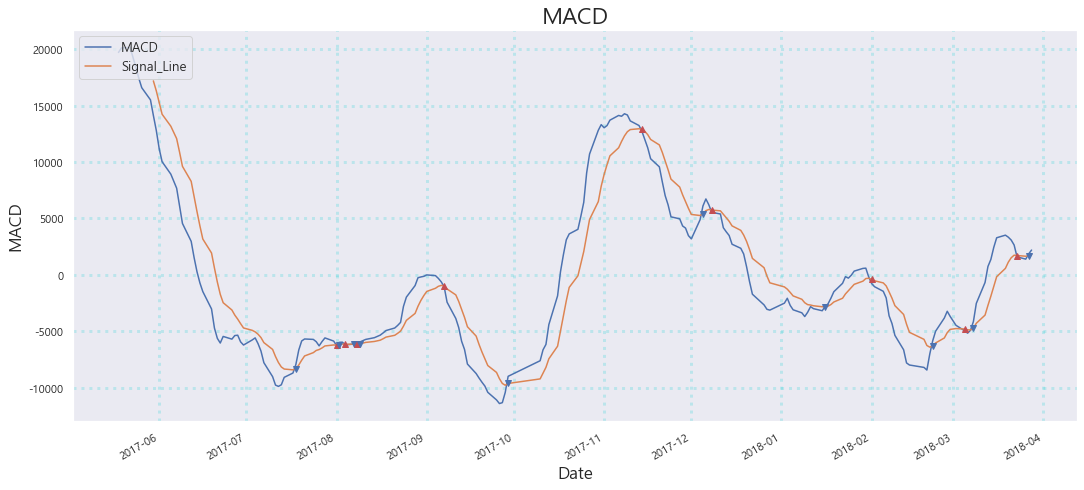

In [57]:
fig, ax1 = plt.subplots(figsize = (25, 5))
아모레퍼시픽17[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(아모레퍼시픽17.index)):
    if (아모레퍼시픽17["MACD"].values[i] >= 아모레퍼시픽17["Signal_Line"].values[i]) and (아모레퍼시픽17["MACD"].values[i-1] < 아모레퍼시픽17["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(아모레퍼시픽17.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽17['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽17.index.values[i], 아모레퍼시픽17['Signal_Line'].values[i], 'bv')
    elif (아모레퍼시픽17["MACD"].values[i] <= 아모레퍼시픽17["Signal_Line"].values[i]) and (아모레퍼시픽17["MACD"].values[i-1] > 아모레퍼시픽17["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(아모레퍼시픽17.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽17['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽17.index.values[i], 아모레퍼시픽17['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [16]:
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

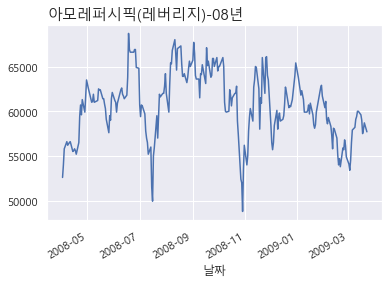

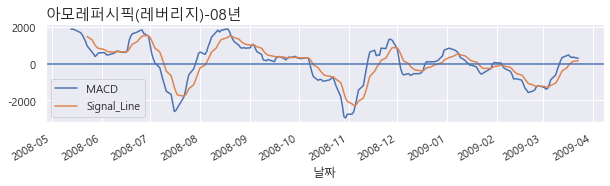

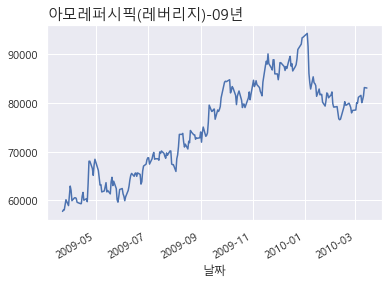

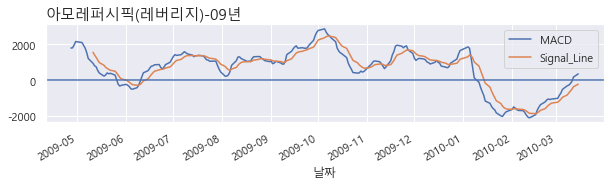

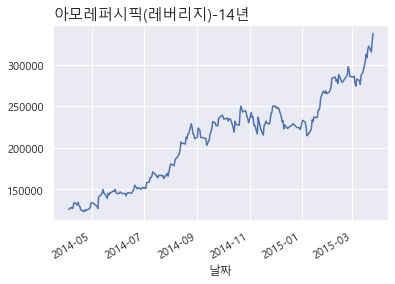

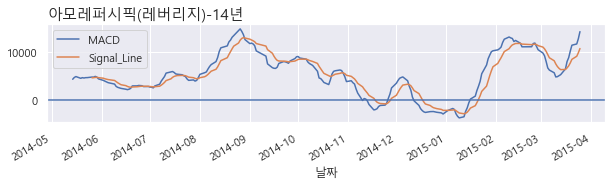

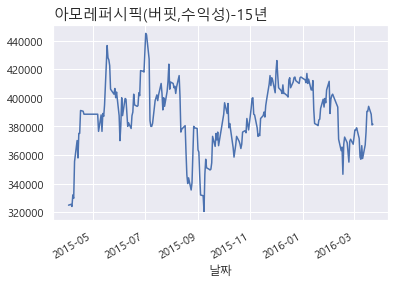

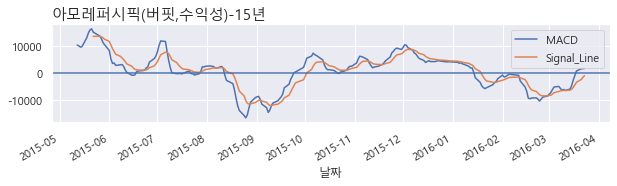

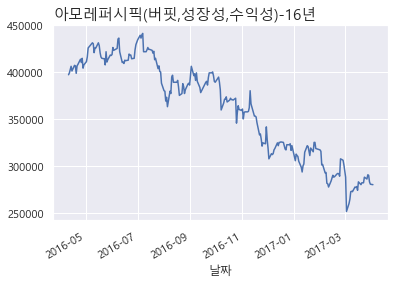

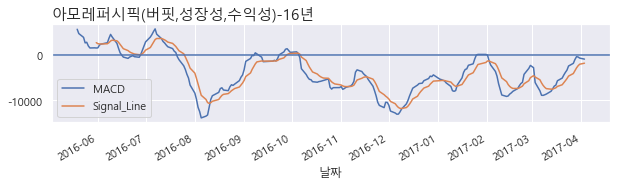

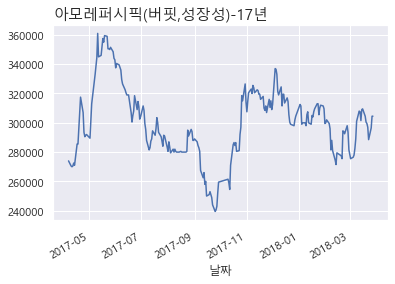

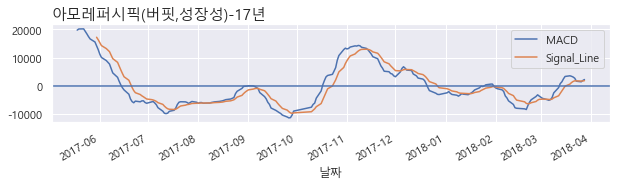

In [59]:
plt.rcParams['font.family']= 'Malgun Gothic'

아모레퍼시픽["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('아모레퍼시픽(레버리지)-08년', size= 15, rotation = 0, loc = 'left')   
아모레퍼시픽[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('아모레퍼시픽(레버리지)-08년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

아모레퍼시픽09["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('아모레퍼시픽(레버리지)-09년', size= 15, rotation = 0, loc = 'left')   
아모레퍼시픽09[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('아모레퍼시픽(레버리지)-09년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

아모레퍼시픽14["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('아모레퍼시픽(레버리지)-14년', size= 15, rotation = 0, loc = 'left')   
아모레퍼시픽14[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('아모레퍼시픽(레버리지)-14년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

아모레퍼시픽15["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('아모레퍼시픽(버핏,수익성)-15년', size= 15, rotation = 0, loc = 'left')   
아모레퍼시픽15[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('아모레퍼시픽(버핏,수익성)-15년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

아모레퍼시픽16["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('아모레퍼시픽(버핏,성장성,수익성)-16년', size= 15, rotation = 0, loc = 'left')   
아모레퍼시픽16[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('아모레퍼시픽(버핏,성장성,수익성)-16년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

아모레퍼시픽17["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('아모레퍼시픽(버핏,성장성)-17년', size= 15, rotation = 0, loc = 'left')   
아모레퍼시픽17[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('아모레퍼시픽(버핏,성장성)-17년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

In [27]:
#아모레퍼시픽09

import locale
locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 83021.0
--------------- 83121.0
Buy[1] holding[1] price[65117] cash[934653.57] value[999770.57]
Sell[1] holding[0] price[69918] cash[1002734.13] value[1002734.13]
Buy[1] holding[1] price[69618] cash[932475.90] value[1002093.90]
Sell[1] holding[0] price[69018] cash[1001754.06] value[1001754.06]
Buy[1] holding[1] price[73519] cash[928990.83] value[1002509.83]
Sell[1] holding[0] price[72719] cash[1001563.39] value[1001563.39]
Buy[1] holding[1] price[79520] cash[925292.15] value[1004812.15]
Sell[1] holding[0] price[81521] cash[1008147.11] value[1008147.11]
Buy[1] holding[1] price[83321] cash[923958.07] value[1007279.07]
Sell[1] holding[0] price[81421] cash[1006413.83] value[1006413.83]
Buy[1] holding[1] price[88523] cash[918516.38] value[1007039.38]
Sell[1] holding[0] price[84722] cash[1004466.14] value[1004466.14]
Buy[1] holding[1] price[92024] cash[915165.90] value[1007189.90]
Sell[1] holding[0] price[84122] cash[1001714.45] value[1001714.45]
Buy[1] holding[1] price[79821

In [35]:
#아모레퍼시픽14

import locale
locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 337487.0
--------------- 328084.0
Buy[1] holding[1] price[150639] cash[844851.32] value[995490.32]
Sell[1] holding[0] price[152439] cash[996087.24] value[996087.24]
Buy[1] holding[1] price[159041] cash[835726.16] value[994767.16]
Sell[1] holding[0] price[166743] cash[1001436.08] value[1001436.08]
Buy[1] holding[1] price[180647] cash[825239.39] value[1005886.39]
Sell[1] holding[0] price[212655] cash[1035372.28] value[1035372.28]
Buy[1] holding[1] price[238161] cash[797837.16] value[1035998.16]
Sell[1] holding[0] price[234760] cash[1028434.04] value[1028434.04]
Buy[1] holding[1] price[246263] cash[777869.91] value[1024132.91]
Sell[1] holding[0] price[234660] cash[1014656.39] value[1014656.39]
Buy[1] holding[1] price[241062] cash[781231.47] value[1022293.47]
Sell[1] holding[0] price[232360] cash[1013825.35] value[1013825.35]
Buy[1] holding[1] price[223958] cash[785411.44] value[1009369.44]
Sell[1] holding[0] price[216056] cash[997839.73] value[997839.73]
Buy[1] holding[1] 

In [41]:
#아모레퍼시픽15

import locale
locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 381500.0
--------------- 379500.0
Buy[1] holding[1] price[401500] cash[598699.00] value[1000199.00]
Sell[1] holding[0] price[380000] cash[967959.00] value[967959.00]
Buy[1] holding[1] price[423500] cash[552129.00] value[975629.00]
Sell[1] holding[0] price[415500] cash[957317.00] value[957317.00]
Buy[1] holding[1] price[401000] cash[538481.00] value[939481.00]
Sell[1] holding[0] price[376000] cash[935186.00] value[935186.00]
Buy[1] holding[1] price[378500] cash[550418.00] value[928918.00]
Sell[1] holding[0] price[331500] cash[884249.00] value[884249.00]
Buy[1] holding[1] price[350000] cash[534551.00] value[884551.00]
Sell[1] holding[0] price[362500] cash[889340.00] value[889340.00]
Buy[1] holding[1] price[385500] cash[509582.00] value[895082.00]
Sell[1] holding[0] price[374500] cash[881836.00] value[881836.00]
Buy[1] holding[1] price[398500] cash[486046.00] value[884546.00]
Sell[1] holding[0] price[403000] cash[887242.00] value[887242.00]
Buy[1] holding[1] price[405500] 

In [49]:
#아모레퍼시픽16

import locale
locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 280000.0
--------------- 280500.0
Buy[1] holding[1] price[436000] cash[566134.00] value[1002134.00]
Sell[1] holding[0] price[410500] cash[975314.00] value[975314.00]
Buy[1] holding[1] price[431500] cash[543452.00] value[974952.00]
Sell[1] holding[0] price[423500] cash[964608.00] value[964608.00]
Buy[1] holding[1] price[389000] cash[567315.00] value[956315.00]
Sell[1] holding[0] price[389000] cash[951545.00] value[951545.00]
Buy[1] holding[1] price[386000] cash[566276.00] value[952276.00]
Sell[1] holding[0] price[394000] cash[958989.00] value[958989.00]
Buy[1] holding[1] price[399000] cash[559191.00] value[958191.00]
Sell[1] holding[0] price[381000] cash[943920.00] value[943920.00]
Buy[1] holding[1] price[358000] cash[585705.00] value[943705.00]
Sell[1] holding[0] price[333000] cash[928019.00] value[928019.00]
Buy[1] holding[1] price[321500] cash[599363.00] value[920863.00]
Sell[1] holding[0] price[305000] cash[909741.00] value[909741.00]
Buy[1] holding[1] price[321500] 

In [60]:
#아모레퍼시픽17

import locale
locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 304500.0
--------------- 303500.0
Buy[1] holding[1] price[303500] cash[702907.00] value[1006407.00]
Sell[1] holding[0] price[287000] cash[983345.00] value[983345.00]
Buy[1] holding[1] price[283500] cash[695270.00] value[978770.00]
Sell[1] holding[0] price[282000] cash[975209.00] value[975209.00]
Buy[1] holding[1] price[280500] cash[694649.00] value[975149.00]
Sell[1] holding[0] price[267500] cash[972093.00] value[972093.00]
Buy[1] holding[1] price[261500] cash[712074.00] value[973574.00]
Sell[1] holding[0] price[319500] cash[1033430.00] value[1033430.00]
Buy[1] holding[1] price[333000] cash[694754.00] value[1027754.00]
Sell[1] holding[0] price[324500] cash[1016110.00] value[1016110.00]
Buy[1] holding[1] price[304000] cash[712504.00] value[1016504.00]
Sell[1] holding[0] price[302000] cash[1014399.00] value[1014399.00]
Buy[1] holding[1] price[292500] cash[716805.00] value[1009305.00]
Sell[1] holding[0] price[278000] cash[991754.00] value[991754.00]
Buy[1] holding[1] price

*엔씨소프트

In [132]:
start  = "2015-04-03"
end    = "2016-03-23"
ticker = "036570"  #엔씨
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2015-04-03,183500,188500,183000,187500,179224
2015-04-06,187000,189000,185500,185500,106342
2015-04-07,188000,188500,184000,185000,74564
2015-04-08,185500,197000,185500,197000,314063
2015-04-09,197500,198500,195000,197000,175027


In [148]:
start  = "2017-04-07"
end    = "2018-03-28"
ticker = "036570"  
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2017-04-07,318000,322000,314500,319500,112471
2017-04-10,321500,328000,316500,322500,178968
2017-04-11,324000,324500,318500,319500,104679
2017-04-12,321500,340000,321000,337500,349162
2017-04-13,341500,358500,341000,358500,616917


In [133]:
엔씨소프트15 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
엔씨소프트15.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2016-03-17,249500,252500,247500,248000,169810,5169.504582,4625.431884,544.072698
2016-03-18,250000,256000,248500,255000,232841,5378.930386,4776.131585,602.798802
2016-03-21,256000,256000,250000,251500,143053,5202.509801,4861.407228,341.102573
2016-03-22,252000,252500,246000,250000,163675,4885.342564,4866.194295,19.148269
2016-03-23,248500,255500,248500,252500,125571,4780.606494,4849.076735,-68.470241


In [144]:
엔씨소프트17 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
엔씨소프트17.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2018-03-22,425000,427500,419000,422000,117749,2482.559742,-2380.980459,4863.540201
2018-03-23,409500,414500,407500,409000,85341,2379.702229,-1428.843922,3808.546151
2018-03-26,409000,418500,409000,417500,62056,2950.059424,-553.063253,3503.122676
2018-03-27,423000,426500,417000,418000,88621,3403.187603,238.186919,3165.000684
2018-03-28,417500,421500,410500,416500,84389,3599.761673,910.501869,2689.259804


+매수 2015-06-23  201000.00
-매도 2015-07-29  234500.00
+매수 2015-08-28  218500.00
-매도 2015-09-01  200500.00
+매수 2015-09-21  190500.00
-매도 2015-09-23  183000.00
+매수 2015-09-24  189500.00
-매도 2015-10-22  182000.00
+매수 2015-10-30  189500.00
-매도 2015-11-02  186000.00
+매수 2015-11-03  188000.00
-매도 2015-12-02  215500.00
+매수 2016-01-11  220000.00
-매도 2016-02-15  233000.00
+매수 2016-03-04  247000.00
-매도 2016-03-07  233500.00
+매수 2016-03-10  263500.00
-매도 2016-03-23  252500.00


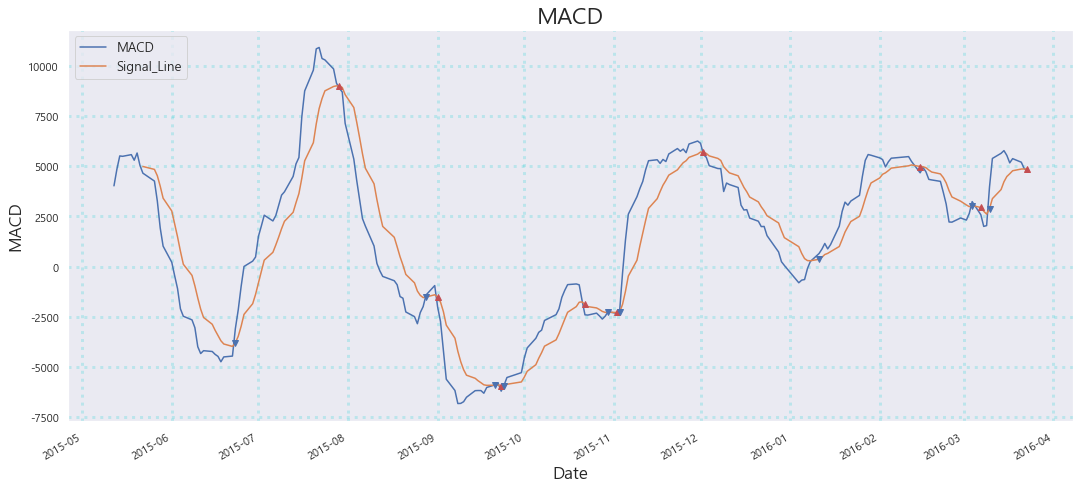

In [134]:
fig, ax1 = plt.subplots(figsize = (25, 5))
엔씨소프트15[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(엔씨소프트15.index)):
    if (엔씨소프트15["MACD"].values[i] >= 엔씨소프트15["Signal_Line"].values[i]) and (엔씨소프트15["MACD"].values[i-1] < 엔씨소프트15["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(엔씨소프트15.index.values[i]).strftime('%Y-%m-%d')}  {엔씨소프트15['Close'].values[i]:.2f}")
        ax1.plot(엔씨소프트15.index.values[i], 엔씨소프트15['Signal_Line'].values[i], 'bv')
    elif (엔씨소프트15["MACD"].values[i] <= 엔씨소프트15["Signal_Line"].values[i]) and (엔씨소프트15["MACD"].values[i-1] > 엔씨소프트15["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(엔씨소프트15.index.values[i]).strftime('%Y-%m-%d')}  {엔씨소프트15['Close'].values[i]:.2f}")
        ax1.plot(엔씨소프트15.index.values[i], 엔씨소프트15['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

+매수 2017-06-05  392500.00
-매도 2017-06-20  361000.00
+매수 2017-07-06  405000.00
-매도 2017-07-11  377000.00
+매수 2017-08-02  374500.00
-매도 2017-08-22  375500.00
+매수 2017-09-01  396000.00
-매도 2017-09-22  440000.00
+매수 2017-11-06  446500.00
-매도 2017-11-13  422000.00
+매수 2017-11-17  438000.00
-매도 2017-12-04  448500.00
+매수 2017-12-06  461000.00
-매도 2017-12-20  435500.00
+매수 2018-01-19  426000.00
-매도 2018-02-06  417000.00
+매수 2018-03-08  388500.00


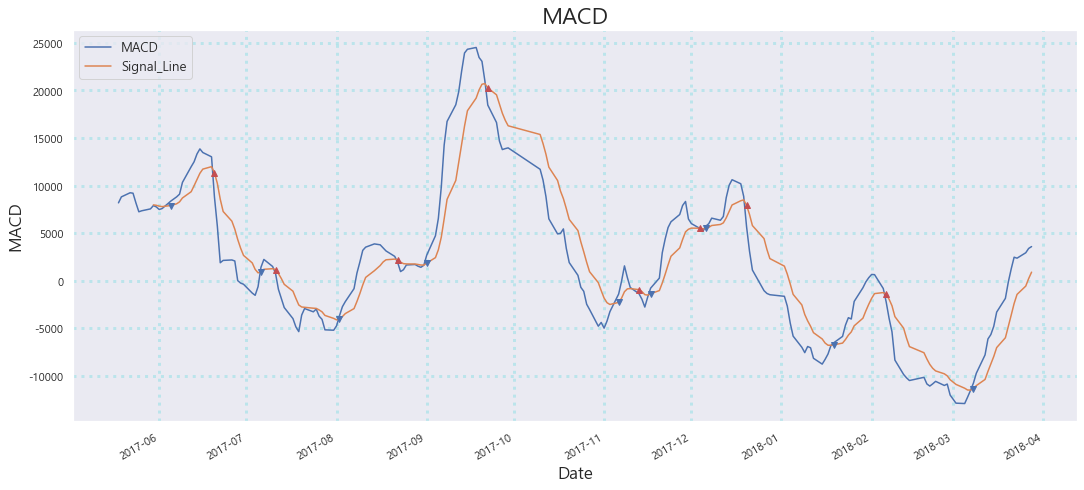

In [145]:
fig, ax1 = plt.subplots(figsize = (25, 5))
엔씨소프트17[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(엔씨소프트17.index)):
    if (엔씨소프트17["MACD"].values[i] >= 엔씨소프트17["Signal_Line"].values[i]) and (엔씨소프트17["MACD"].values[i-1] < 엔씨소프트17["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(엔씨소프트17.index.values[i]).strftime('%Y-%m-%d')}  {엔씨소프트17['Close'].values[i]:.2f}")
        ax1.plot(엔씨소프트17.index.values[i], 엔씨소프트17['Signal_Line'].values[i], 'bv')
    elif (엔씨소프트17["MACD"].values[i] <= 엔씨소프트17["Signal_Line"].values[i]) and (엔씨소프트17["MACD"].values[i-1] > 엔씨소프트17["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(엔씨소프트17.index.values[i]).strftime('%Y-%m-%d')}  {엔씨소프트17['Close'].values[i]:.2f}")
        ax1.plot(엔씨소프트17.index.values[i], 엔씨소프트17['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [135]:
#엔씨소프트15

import locale
locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 252500.0
--------------- 248500.0
Buy[1] holding[1] price[199000] cash[798097.00] value[997097.00]
Sell[1] holding[0] price[236000] cash[1035122.00] value[1035122.00]
Buy[1] holding[1] price[218500] cash[816185.00] value[1034685.00]
Sell[1] holding[0] price[201500] cash[1016783.00] value[1016783.00]
Buy[1] holding[1] price[189000] cash[825401.00] value[1014401.00]
Sell[1] holding[0] price[189500] cash[1010530.00] value[1010530.00]
Buy[1] holding[1] price[190500] cash[820651.00] value[1011151.00]
Sell[1] holding[0] price[188500] cash[1004782.00] value[1004782.00]
Buy[1] holding[1] price[186000] cash[816406.00] value[1002406.00]
Sell[1] holding[0] price[188000] cash[1000537.00] value[1000537.00]
Buy[1] holding[1] price[210000] cash[815668.00] value[1025668.00]
Sell[1] holding[0] price[220000] cash[1028741.00] value[1028741.00]
Buy[1] holding[1] price[219000] cash[806297.00] value[1025297.00]
Sell[1] holding[0] price[242500] cash[1040827.00] value[1040827.00]
Buy[1] holdin

In [146]:
#엔씨소프트17

import locale
locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 416500.0
--------------- 417500.0
Buy[1] holding[1] price[391500] cash[602707.00] value[994207.00]
Sell[1] holding[0] price[365000] cash[949013.00] value[949013.00]
Buy[1] holding[1] price[395500] cash[548213.00] value[943713.00]
Sell[1] holding[0] price[363000] cash[926954.00] value[926954.00]
Buy[1] holding[1] price[375500] cash[550202.00] value[925702.00]
Sell[1] holding[0] price[370000] cash[926448.00] value[926448.00]
Buy[1] holding[1] price[411500] cash[536670.00] value[948170.00]
Sell[1] holding[0] price[444500] cash[975790.00] value[975790.00]
Buy[1] holding[1] price[445000] cash[526894.00] value[971894.00]
Sell[1] holding[0] price[421000] cash[947551.00] value[947551.00]
Buy[1] holding[1] price[442000] cash[504667.00] value[946667.00]
Sell[1] holding[0] price[451000] cash[953767.00] value[953767.00]
Buy[1] holding[1] price[460000] cash[487336.00] value[947336.00]
Sell[1] holding[0] price[436000] cash[925458.00] value[925458.00]
Buy[1] holding[1] price[430500] c

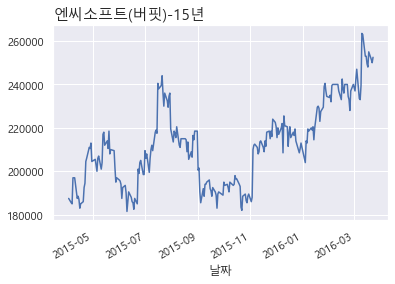

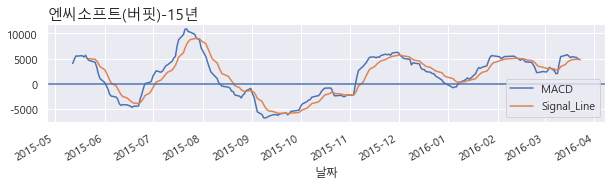

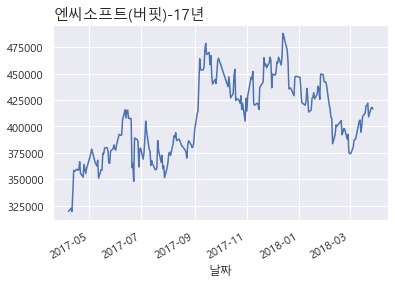

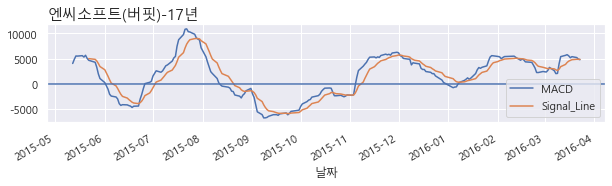

In [147]:
엔씨소프트15["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('엔씨소프트(버핏)-15년', size= 15, rotation = 0, loc = 'left')   
엔씨소프트15[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('엔씨소프트(버핏)-15년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

엔씨소프트17["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('엔씨소프트(버핏)-17년', size= 15, rotation = 0, loc = 'left')   
엔씨소프트15[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('엔씨소프트(버핏)-17년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()